In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sklearn preproccesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
# regrassion
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor


In [4]:
# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df=pd.read_csv('data.csv') #https://www.kaggle.com/datasets/jacksondivakarr/laptop-price-prediction-dataset
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
43,44,46,Lenovo,IdeaPad 3 15IAU7 82RK00WXIN Laptop,41190,69.323529,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,256GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
124,128,141,Chuwi,CoreBook X Laptop,23990,69.323529,10th Gen Intel Core i3 1005G1,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,14.0,1920.0,1200.0,Windows 11 OS,1
482,504,571,Acer,Swift SF514-52T NX.GTMSI.025 Laptop,54490,61.000000,8th Gen Intel Core i5 8250U,"Quad Core, 8 Threads",8GB,DDR3,512GB,SSD,Intel Integrated UHD 620,14.0,1920.0,1080.0,Windows 10 OS,1
735,771,856,HP,ZBook Firefly 16 G9 2023 Workstation Laptop,97705,67.000000,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",16GB,DDR5,512GB,SSD,4GB NVIDIA RTX A500,16.0,1920.0,1200.0,Windows 11 OS,1
376,396,437,Apple,MacBook Pro 14 inch Laptop,234990,69.323529,Apple M2 Pro M2 Pro,12 Cores,16GB,Unified,1TB,SSD,19-core GPU,14.2,3024.0,1964.0,Mac OS,1


#Y_data profiling


In [6]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00


In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Laptop Price Prediction Report",explorative=True)

profile.to_file("laptop_price_prediction_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:01<00:00, 10.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Preproccesing

In [8]:
# Converting resolution to one column
df["screen_pixels"] = df["resolution_width"] * df["resolution_height"]

In [9]:
# droping all unneccesary columns
df.drop(columns=["resolution_width","processor", "resolution_height","Unnamed: 0.1","Unnamed: 0","name"],inplace=True)


In [10]:
# converting pricing to taka (it was on rupee before)
df["price_tk"] = df["price"] * 1.36
df.drop(columns=["price"],inplace=True)

In [11]:
df.sample(5)

,brand,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,screen_pixels,price_tk
812,MSI,66.000000,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB NVIDIA GeForce RTX 2050,15.6,Windows 11 OS,2,2073600.0,65266.40
484,Dell,62.000000,"Quad Core, 8 Threads",8GB,DDR4,256GB,SSD,Intel UHD Graphics,13.3,Windows 10 OS,1,2073600.0,122398.64
579,Lenovo,69.323529,"Quad Core, 8 Threads",8GB,LPDDR5,512GB,SSD,AMD Radeon 610M,15.6,Windows 11 OS,1,2073600.0,55746.40
82,Acer,64.000000,"Quad Core, 8 Threads",8GB,DDR4,512GB,SSD,Intel Iris XE Graphics,15.6,Windows 11 OS,1,2073600.0,53026.40
496,HP,69.323529,"Hexa Core, 12 Threads",16GB,DDR4,512GB,SSD,AMD Radeon AMD,14.0,Windows 11 OS,1,2073600.0,76146.40


In [12]:
# creating gpu type

def get_gpu_type(gpu):
    gpu = str(gpu).lower()
    if any(x in gpu for x in ["nvidia", "rtx", "gtx", "geforce","Radeon Pro"]):
        return "Dedicated"
    elif any(x in gpu for x in ["intel", "iris", "uhd", "integrated", "apple", "amd", "arm", "core"]):
        return "Integrated"
    else:
        return "Unknown"

df["gpu_type"] = df["GPU"].apply(get_gpu_type)


In [13]:
# creating gpu brand
def get_gpu_brand(gpu):
    gpu = str(gpu).lower()
    if "nvidia" in gpu or "rtx" in gpu or "gtx" in gpu:
        return "NVIDIA"
    elif "amd" in gpu or "radeon" in gpu:
        return "AMD"
    elif "intel" in gpu:
        return "Intel"
    elif "apple" in gpu:
        return "Apple"
    else:
        return "Other"

df["gpu_brand"] = df["GPU"].apply(get_gpu_brand)


In [14]:
# creating gpu tier
import re

def get_gpu_tier(gpu):
    gpu = str(gpu).lower()
    gpu = re.sub(r"\s+", " ", gpu)

    # Apple GPUs (integrated but high-performing)
    if "apple" in gpu or "m1" in gpu or "m2" in gpu:
        return "Mid"

    # High-end NVIDIA RTX
    if re.search(r"rtx\s*(40[7-9]0)", gpu):
        return "High"

    # Mid-range NVIDIA RTX
    if re.search(r"rtx\s*(30[5-8]0|40[5-6]0|20[5-6]0)", gpu):
        return "Mid"

    # Low-end NVIDIA
    if "gtx" in gpu or "mx" in gpu:
        return "Low"

    # AMD high-end
    if re.search(r"rx\s*(78|79)\d{2}", gpu):
        return "High"

    # AMD mid-range
    if re.search(r"rx\s*(55|56|66|67)\d{2}", gpu):
        return "Mid"

    # AMD integrated
    if "vega" in gpu:
        return "Low"

    # Intel integrated
    if any(x in gpu for x in ["iris", "uhd", "intel"]):
        return "Low"

    return "Unknown"



df["gpu_tier"] = df["GPU"].apply(get_gpu_tier)
df.loc[
    (df["gpu_tier"] == "Unknown") & (df["gpu_type"] == "Integrated"),
    "gpu_tier"
] = "Low"



In [15]:
# droping rare cases
df.drop(index=215, inplace=True)
df.drop(index=565, inplace=True)


In [16]:
df['gpu_tier'].value_counts()

,count
gpu_tier,
Low,616
Mid,244
High,24
Unknown,7


In [17]:
def extract_cpu_cores(cpu):
    if pd.isna(cpu):
        return np.nan

    cpu = cpu.lower()

    # Numeric cores (e.g., "6 cores")
    match = re.search(r'(\d+)\s*core', cpu)
    if match:
        return int(match.group(1))

    # Word-based cores
    core_map = {
        'dual': 2,
        'quad': 4,
        'hexa': 6,
        'octa': 8,
        'deca': 10
    }

    for word, value in core_map.items():
        if word in cpu:
            return value

    return np.nan

In [18]:
def extract_cpu_threads(cpu):
    if pd.isna(cpu):
        return np.nan

    cpu = cpu.lower()

    # Numeric threads (e.g., "12 threads")
    match = re.search(r'(\d+)\s*thread', cpu)
    if match:
        return int(match.group(1))

    return np.nan


In [19]:
df['cpu_cores'] = df['CPU'].apply(extract_cpu_cores)
df['cpu_threads'] = df['CPU'].apply(extract_cpu_threads)


In [20]:
df.sample(5)

,brand,spec_rating,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty,screen_pixels,price_tk,gpu_type,gpu_brand,gpu_tier,cpu_cores,cpu_threads
73,Dell,62.000000,"Quad Core, 8 Threads",8GB,DDR4,512GB,SSD,AMD Radeon Radeon Graphics,15.6,Windows 11 OS,1,2073600.0,50306.40,Integrated,AMD,Low,4.0,8.0
503,HP,69.323529,"Quad Core, 8 Threads",8GB,DDR4,512GB,SSD,AMD Radeon AMD,15.6,Windows OS,1,2073600.0,46238.64,Integrated,AMD,Low,4.0,8.0
848,Lenovo,64.000000,"Quad Core, 8 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,Windows 11 OS,3,2073600.0,100640.00,Integrated,Intel,Low,4.0,8.0
641,Lenovo,69.323529,"Quad Core, 8 Threads",8GB,LPDDR5,512GB,SSD,AMD Radeon 610M Graphics,15.6,Windows 11 OS,1,2073600.0,66626.40,Integrated,AMD,Low,4.0,8.0
647,MSI,76.000000,"10 Cores (6P + 4E), 16 Threads",16GB,DDR5,512GB,SSD,6GB NVIDIA GeForce RTX 3050,15.6,Windows 11 OS,2,2073600.0,116946.40,Dedicated,NVIDIA,Mid,10.0,16.0


In [21]:
df['cpu_threads'].value_counts()

,count
cpu_threads,
12.0,297
16.0,210
8.0,178
4.0,59
20.0,52
2.0,36
32.0,17
24.0,10
6.0,7


In [22]:
print(df['cpu_threads'].median())

12.0


In [23]:
df['cpu_cores'].fillna(df['cpu_cores'].median(), inplace=True)
df['cpu_threads'].fillna(df['cpu_threads'].median(), inplace=True)


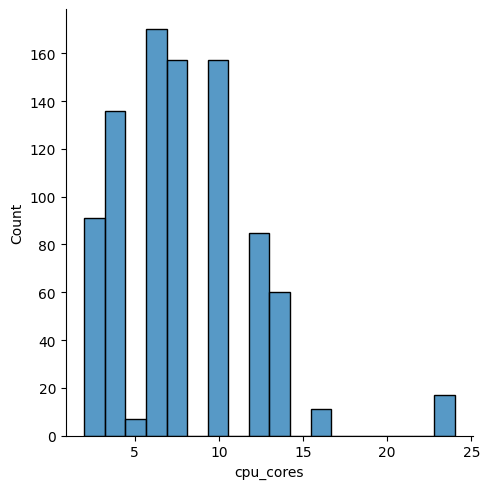

In [24]:
sns.displot(df['cpu_cores'])

In [25]:
df['ROM_type'].value_counts()


,count
ROM_type,
SSD,870
Hard-Disk,21


In [26]:
df["is_ssd"] = (df["ROM_type"] == "SSD").astype(int)


In [27]:
df["is_integrated"] = (df["gpu_type"] == "Integrated").astype(int)

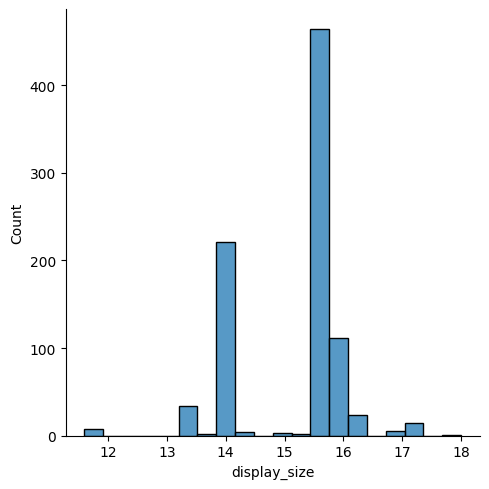

In [28]:
sns.displot(df['display_size'])

In [29]:
df['Ram_type'].value_counts()

,count
Ram_type,
DDR4,498
DDR5,165
LPDDR5,145
LPDDR4X,41
LPDDR4,14
LPDDR4x,13
Unified,7
DDR3,3
LPDDR5X,2


In [30]:
df.drop(columns=['CPU','GPU','ROM_type','gpu_type'],inplace=True)

In [77]:
df.sample(30)

,brand,spec_rating,Ram,Ram_type,ROM,display_size,OS,warranty,screen_pixels,price_tk,gpu_brand,gpu_tier,cpu_cores,cpu_threads,is_ssd,is_integrated
96,Samsung,69.323529,8GB,LPDDR4,512GB,15.6,Windows 11 OS,1,2073600.0,67986.40,Intel,Low,10.0,12.0,1,1
801,Acer,69.323529,8GB,DDR4,256GB,15.6,Windows 11 OS,1,2073600.0,40772.80,Intel,Low,8.0,8.0,1,1
488,Lenovo,64.000000,16GB,LPDDR5,1TB,14.0,Windows 11 OS,1,2304000.0,301906.40,Intel,Low,10.0,12.0,1,1
604,Lenovo,69.000000,16GB,DDR4,512GB,16.0,Windows 11 OS,1,2073600.0,73412.80,AMD,Low,8.0,16.0,1,1
890,Asus,89.000000,32GB,DDR5,1TB,14.0,Windows 11 OS,1,4096000.0,258386.40,NVIDIA,Mid,8.0,16.0,1,0
705,Infinix,62.000000,16GB,LPDDR4X,1TB,15.6,Windows 11 OS,1,2073600.0,72066.40,Intel,Low,4.0,8.0,1,1
637,Lenovo,60.000000,16GB,DDR4,512GB,15.6,Windows 11 OS,1,2073600.0,78866.40,AMD,Low,8.0,16.0,1,1
192,Asus,66.000000,16GB,DDR4,512GB,15.6,Windows 11 OS,1,2073600.0,99266.40,NVIDIA,Mid,6.0,12.0,1,0
232,HP,60.000000,8GB,DDR4,512GB,15.6,Windows 11 OS,1,1049088.0,50318.64,Intel,Low,6.0,8.0,1,1
846,Dell,72.000000,16GB,LPDDR5,1TB,14.0,Windows 11 OS,1,4096000.0,284226.40,NVIDIA,Mid,10.0,16.0,1,0


In [68]:
df.columns

Index(['brand', 'spec_rating', 'Ram', 'Ram_type', 'ROM', 'display_size', 'OS',
       'warranty', 'screen_pixels', 'price_tk', 'gpu_brand', 'gpu_tier',
       'cpu_cores', 'cpu_threads', 'is_ssd', 'is_integrated'],
      dtype='object')

#pipelines


In [32]:
X=df.drop(columns=['price_tk'])
Y=df['price_tk']

In [33]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [34]:
# for num
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [35]:
# for cat
cat_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [36]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
# base learner
lr = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [39]:
#voting regressor
voting_reg = VotingRegressor(
estimators=[("lr",lr),
            ("rf",rf),
            ("gb",gb)])

In [40]:
#stacking regressor
stack_reg = StackingRegressor(estimators=[("rf",rf),("gb",gb)],final_estimator=Ridge())

# training model

In [41]:
# dictionary of all models
model_to_run = {
    "Linear Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Voting Regressor": voting_reg,
    "Stacking Regressor": stack_reg
}


# training & evaluation

In [42]:
res = []

for name,model in model_to_run.items():
  pipe = Pipeline(steps=[
      ('preprocesor',preprocessor),
      ('model',model)
  ])

  # train
  pipe.fit(x_train,y_train)

  # predict
  y_pred = pipe.predict(x_test)

  # evaluation
  r2 = r2_score(y_test,y_pred)
  mae =mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)


  res.append({
      'model':name,
      'r2':r2,
      'mae':mae,
      'mse':mse,
      'rmse':rmse
  })

rdf = pd.DataFrame(res).sort_values(by='r2',ascending=False)
rdf


,model,r2,mae,mse,rmse
3,Voting Regressor,0.783498,19921.740186,1.893115e+09,43509.944153
1,Random Forest,0.782313,20012.016276,1.903476e+09,43628.846697
4,Stacking Regressor,0.765381,21603.341902,2.051532e+09,45293.844148
2,Gradient Boosting,0.759336,21885.695571,2.104395e+09,45873.685934
0,Linear Regression,0.751490,23954.908242,2.172996e+09,46615.400244


# visuualisation

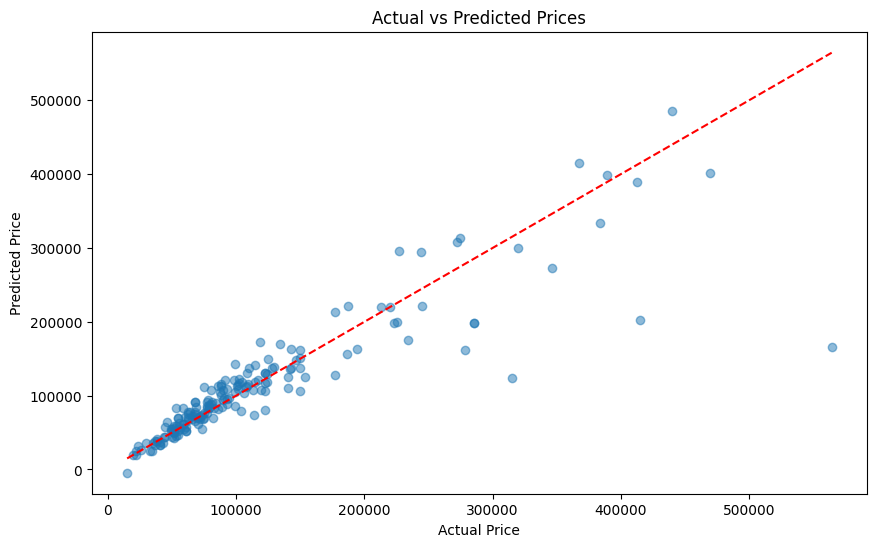

In [43]:
best_model = rdf.iloc[0]['model']
best_model_obj = model_to_run[best_model]

# final fitting
final_pipe = Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('model',best_model_obj)
])

final_pipe.fit(x_train,y_train)
final_y_pred = final_pipe.predict(x_test)


# plot actual vs best pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# cross validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
rf_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [46]:
# 5 fold cross validation
cv_scores = cross_val_score(rf_pipe,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(cv_rmse)

[35408.25288029 40268.68772478 42160.12244372 20915.53421471
 37467.82309861]


In [47]:
print(cv_rmse.mean())
print(cv_rmse.std())

35244.08407242147
7528.0480377772365


stacking ensemble

In [48]:
stack_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',stack_reg)
])

In [49]:
# 5 fold cross validation
cv_scores = cross_val_score(stack_pipe,x_train,y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores)
print(cv_rmse)

[34385.93485392 41117.25655641 37655.03370018 22271.54305571
 33953.87648218]


In [50]:
print(cv_rmse.mean())
print(cv_rmse.std())

33876.72892968237
6350.533975025876


# greed serach cross validation

In [51]:
rf_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [52]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

In [53]:
from sklearn.model_selection import GridSearchCV

greed_scorers = GridSearchCV(
    estimator = rf_pipe,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 2,
    n_jobs = -1
)


In [54]:
grid_result = greed_scorers.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [56]:
print(-grid_result.best_score_)
print(grid_result.best_params_)

1298816969.362995
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}


#randomize search cv

In [61]:
from scipy.stats import randint

my_dist = randint(1,10)
print(my_dist.rvs(5))

[6 7 4 6 9]


In [62]:
param_dist = {
    'model__n_estimators': randint(100,500),
    'model__max_depth': (None,1,10),
    'model__min_samples_split': randint(2,10)
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

rand_scorers = RandomizedSearchCV(
    estimator = rf_pipe,
    param_distributions = param_dist,
    n_iter = 50,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 2,
    n_jobs = -1,
    random_state = 42
)
rand_scorers.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['spec_rating', 'display_size', 'warranty', 'screen_pixels', 'cpu_cores',
       'cpu_threads', 'is_ssd', 'is_integrated'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__max_depth': (None, 1, 10),
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x780ab278c800>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x780ab2405a00>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
print(-rand_scorers.best_score_)
print(rand_scorers.best_params_)

1290369963.7244575
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 158}


#saving the model with pickling

In [65]:
import pickle
filename = 'random_forest_model.plk'

with open(filename, 'wb') as file:
  pickle.dump(rand_scorers, file)


In [66]:
with open('/content/random_forest_model.plk','rb') as file:
  rf_loaded_model=pickle.load(file)

In [67]:
rf_loaded_model.predict(x_test)

array([ 90713.56299578,  91892.28001688,  49919.65133213, 106530.40101266,
       114464.71848101,  22358.04995781,  54184.32830621, 161410.34902954,
       114813.16253165,  25663.33772152,  48724.13087161, 406636.7635443 ,
        71987.92455696, 121790.57367089, 112642.95113924, 284164.17118746,
        83637.28915411, 298767.45974683,  53758.30594937,  28195.16708861,
       136454.79949367,  37106.99746835,  89063.69721519, 419294.49012658,
        33925.51561181, 428494.70936709,  83375.63493671,  86933.61012658,
       139050.46278481,  70946.08708861,  50183.2067179 , 299324.48877637,
        95637.90622785, 116310.56556962, 142815.52703556,  36484.94092827,
        70018.0678481 ,  36658.70962025,  79869.7356962 , 279102.90413502,
       106140.44253165,  49463.54372996, 102724.58963713,  74739.56607595,
       196713.56759494,  82498.89113924,  79728.41620253,  25663.33772152,
        87103.54987342, 179050.2864135 ,  46954.07402532, 325998.08270042,
        37789.73181435, 3